# Random Forest Classifier

## Importing the libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [48]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Splitting the Fearures and the target

In [49]:
X = df.drop(columns='Purchased',axis=1)
y = df['Purchased']

In [50]:
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [51]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


## Splitting the dataset into the Training set and Test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [53]:
print(X_train)

     Age  EstimatedSalary
247   57           122000
110   39            71000
16    47            25000
66    24            19000
153   36            50000
..   ...              ...
71    24            27000
106   26            35000
270   43           133000
348   39            77000
102   32            86000

[300 rows x 2 columns]


In [54]:
print(y_train)

247    1
110    0
16     1
66     0
153    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 300, dtype: int64


In [55]:
print(X_test)

     Age  EstimatedSalary
209   46            22000
280   59            88000
33    28            44000
210   48            96000
93    29            28000
..   ...              ...
314   39            79000
373   59           130000
380   42            64000
239   53           143000
75    34           112000

[100 rows x 2 columns]


In [56]:
print(y_test)

209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64


## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]
 [-0.56234321  2.33980255]
 [ 1.0088136  -1.19473064]
 [-0.75873781  1.08372877]
 [ 2.1871812  -1.04867555]
 [ 0.0268406  -0.25997806]
 [-0.46414591 -1.1363086 ]
 [ 0.1250379   0.03213212]
 [ 1.6961947  -0.90262046]
 [ 1.1070109  -0.90262046]
 [ 0.5178271   1.22978386]
 [-1.05332971 -1.4576298 ]
 [-1.15152701 -1.54526286]
 [-0.0713567   0.67477452]
 [ 0.4196298  -0.46445519]
 [-0.2677513  -0.25997806]
 [-0.85693511  0.14897619]
 [ 0.0268406   0.29503128]
 [ 0.7142217  -1.28236369]
 [ 1.5979974   1.11293979]
 [ 0.812419   -1.36999675]
 [-1.44611891 -1.22394166]
 [-0.0713567   0.14897619]
 [ 0.4196298  -0.14313399]
 [-0.2677513   0.03213212]
 [ 1.3034055   2.22295848]
 [ 0.1250379   0.76240757]
 [-1.34792161  0.55793045]
 [ 1.9907866   0.73319655]
 [-1.24972431 -1.39920777]
 [ 0.3214325  -0.3184001 ]
 [-0.95513241  0.55793045]
 [ 0.4196298   0.29503128]
 

In [22]:
print(X_test)

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]
 [-0.2677513  -0.14313399]
 [ 1.4998001  -1.04867555]
 [-1.44611891 -0.6397213 ]
 [-1.74071081 -1.36999675]
 [-0.75873781  0.49950841]
 [-0.2677513   1.11293979]
 [ 1.4016028  -0.93183148]
 [ 0.812419    0.11976517]
 [ 0.1250379  -0.8149874 ]
 [ 1.794392   -0.28918908]
 [-1.54431621 -1.25315268]
 [-0.85693511  0.29503128]
 [ 0.9106163  -1.36999675]
 [ 2.0889839   0.17818721]
 [-1.83890811 -1.48684082]
 [ 1.3034055  -1.36999675]
 [ 0.4196298   0.29503128]
 [-0.0713567  -0.49366621]
 [ 1.6961947   1.6095271 ]
 [-1.83890811 -1.42841878]
 [ 0.812419   -0.84419842]
 [-1.83890811  0.0029211 ]
 [-0.169554    2.16453644]
 [-0.95513241  0.26582026]
 [ 0.2232352   1.08372877]
 [-0.2677513   0.14897619]
 [-0.0713567  -0.43524417]
 

 Training the Descision Tree model on the Training set

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)  # Or DecisionTreeRegressor for regression
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predicting a new result

In [35]:
prediction = model.predict(sc.transform([[32,150000]]))
print(prediction)

if (prediction[0]== 0):
  print('The Person will not purchase')
else:
  print('The Person will purchase')

[1]
The Person will purchase


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Predicting the Test set results

In [43]:
y_pred = model.predict(X_test)
# Directly reshape y_pred, assuming it is a numpy array
y_pred_array = y_pred.reshape(-1, 1)

# Convert y_test to a numpy array and reshape it, regardless of its original type
y_test_array = np.array(y_test).reshape(-1, 1)

# Concatenate arrays along the second axis (column-wise concatenation)
combined_array = np.concatenate((y_pred_array, y_test_array), axis=1)
print(combined_array)

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]]


## Making the Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56  7]
 [ 4 33]]


0.89

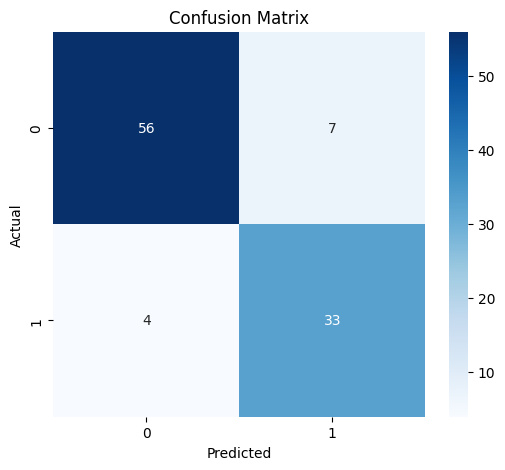

In [62]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])  # Assuming binary classification
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()